In [169]:
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt


In [170]:
sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_5_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_5_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_5_l2.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_5_l3.h5']

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'] ))
    fin.close()

In [171]:
'''datadict = {
    'Level 1': np.array(samples[0]),
    'Level 2': samples[1],
    'Level 3': samples[2],
    'Level 4': samples[3]
}

arr = np.array(samples[0])
print(arr.shape)


coords = {'x':0, 'y':1, 'z':2}
dims = {'Level 1': ['x','y','z']}

#dataset = az.convert_to_dataset(datadict, coords=coords, dims=dims)
#dataset 

#s = np.array(samples)
#print(s)
dataset = az.convert_to_inference_data(datadict)
dataset'''

"datadict = {\n    'Level 1': np.array(samples[0]),\n    'Level 2': samples[1],\n    'Level 3': samples[2],\n    'Level 4': samples[3]\n}\n\narr = np.array(samples[0])\nprint(arr.shape)\n\n\ncoords = {'x':0, 'y':1, 'z':2}\ndims = {'Level 1': ['x','y','z']}\n\n#dataset = az.convert_to_dataset(datadict, coords=coords, dims=dims)\n#dataset \n\n#s = np.array(samples)\n#print(s)\ndataset = az.convert_to_inference_data(datadict)\ndataset"

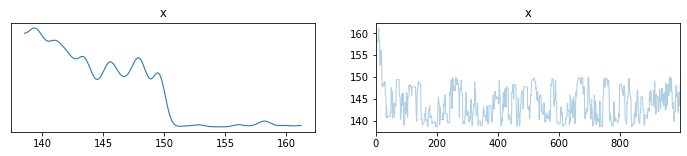

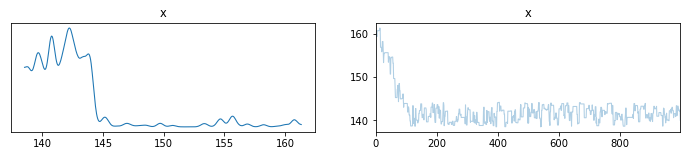

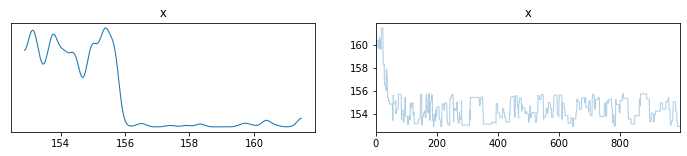

In [172]:
for i in range(len(sample_paths)):
    s = samples[i]
    az.plot_trace(s[0,:])

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

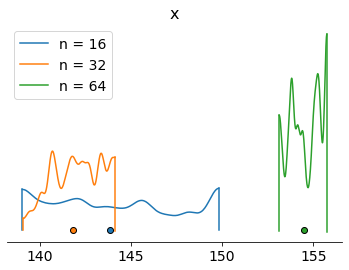

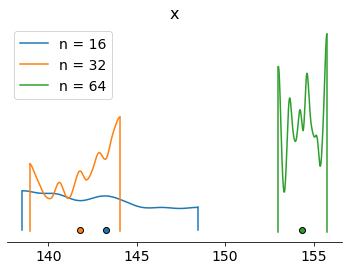

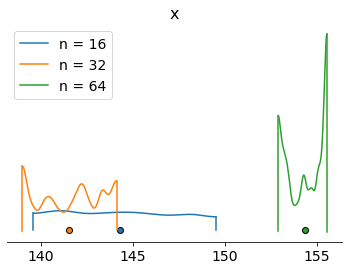

In [173]:
s0 = []
s1 = []
s2 = []

start = 500

data_labels = ["n = 16", "n = 32", "n = 64", "n = 128"]

for i in range(len(sample_paths)):
    s0.append(samples[i][0,start:])
    s1.append(samples[i][1,start:])
    s2.append(samples[i][2,start:])

az.plot_density(s0, data_labels=data_labels)
az.plot_density(s1, data_labels=data_labels)
az.plot_density(s2, data_labels=data_labels)



In [174]:
num = len(samples[0][0])
start = 1000
#num = 100
point = np.array([110,120,130])

for i in range(len(sample_paths)):
    print("Level " + str(i) + ":")
    mean = np.mean(samples[i][:,start:num], axis=1)
    var = np.var(samples[i][:,start:num], axis=1)
    print("Mean = " + str(mean))
    #print("Variance = " + str(var))
    print("DLE = "+ str(np.linalg.norm(mean-point)))
    print("\n")

'''
print("MLDA :")
mean = np.mean(samples[4][:,start:num], axis=1)
print("Mean = " + str(mean))
print("DLE = "+ str(np.linalg.norm(mean-point)))
'''

Level 0:
Mean = [nan nan nan]
DLE = nan


Level 1:
Mean = [nan nan nan]
DLE = nan


Level 2:
Mean = [nan nan nan]
DLE = nan




/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/lib/python3/dist-packages/numpy/core/_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


'\nprint("MLDA :")\nmean = np.mean(samples[4][:,start:num], axis=1)\nprint("Mean = " + str(mean))\nprint("DLE = "+ str(np.linalg.norm(mean-point)))\n'

IndexError: list index out of range

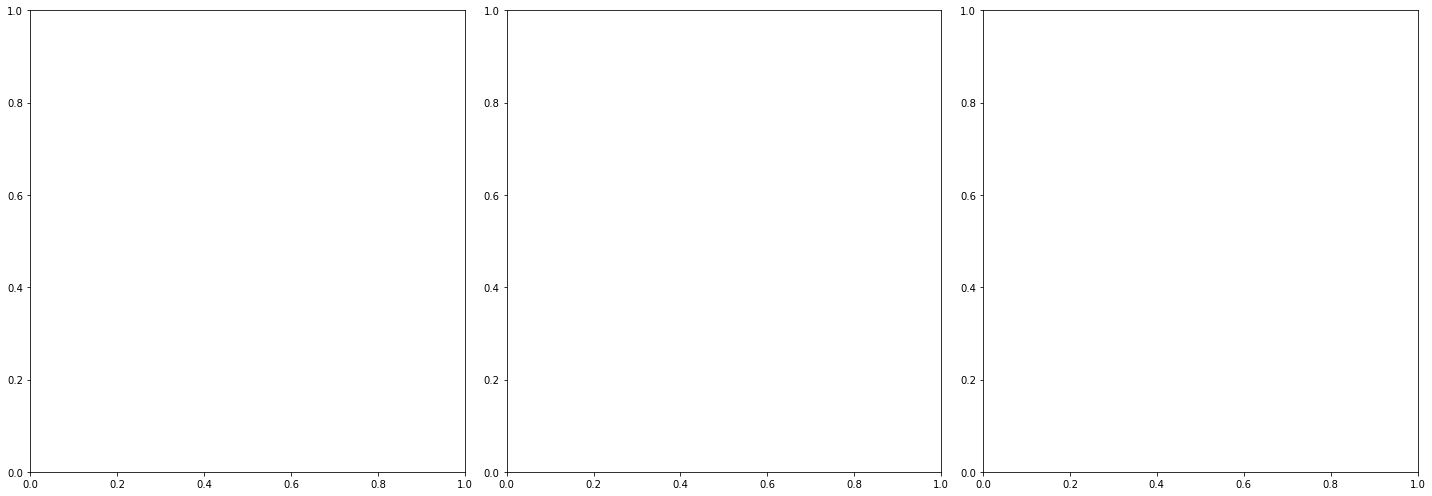

In [175]:
fig, axs = plt.subplots(1, 3,
                        figsize =(20, 7),
                        tight_layout = True)
start = 500

plot = axs[0].hist(samples[3][0,start:], bins = 128, range = [35,219])

plot = axs[1].hist(samples[3][1,start:], bins = 128, range = [35,219])

plot = axs[2].hist(samples[3][2,start:], bins = 128, range = [35,219])

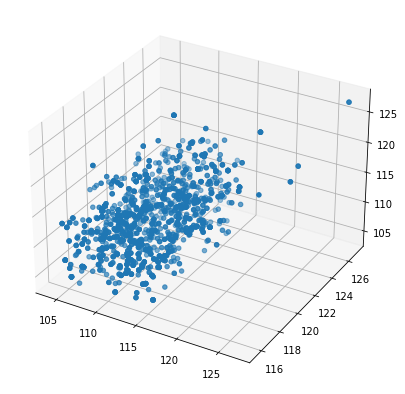

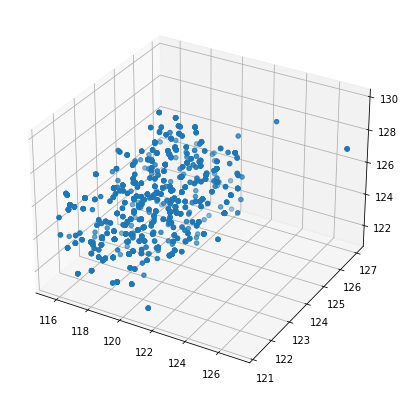

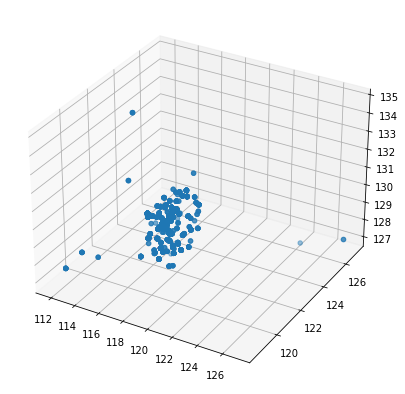

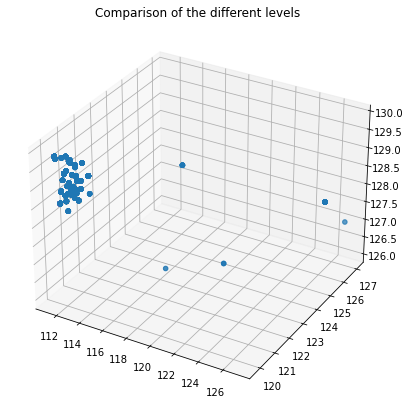

In [ ]:
for i in range(len(sample_paths)-1):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(samples[i][0,:], samples[i][1,:], samples[i][2,:])

plt.title("Comparison of the different levels")

plt.show()

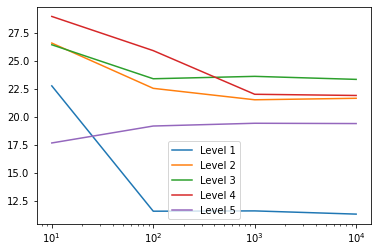

In [ ]:
nums = [10, 100, 1000, 10000]
point = np.array([110,110,110])

for i in range(len(sample_paths)):
    errors = []
    
    for num in nums:
        mean = np.mean(samples[i][:,0:num], axis=1)
        errors.append(np.linalg.norm(mean-point))
    
    plt.plot(nums, errors, label='Level '+str(i+1))

plt.xscale("log")
plt.legend()
plt.show()